# Practice: Data Cleaning

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [39]:
# Wrangle Function

def wrangle (filename, encoding = None, dropna_columnnames = None, change_column_name= None, date_column= None, remove_duplicated_rows_columnsname = None):
    # Loading Data from csv file
    df = pd.read_csv(filename, encoding= encoding)

    ### Get Orders NaN Rows
    df.dropna(subset= dropna_columnnames, inplace=True)

    # Rename Columns
    df = df.rename(columns= change_column_name)
    
    # Change OrderDate and ID Columns type to Date, integer
    df[date_column] = pd.to_datetime(df[date_column])    

    #Drop dupliacted rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_columnsname)

       
    #Strip and lowercase columns names
    df.columns = df.columns.str.strip().str.lower()
    
    return df

### Issues:
* Delete orders with NaN values
* Rename `City.1, Country.1, Phon.1` Columns
* Change `OrderDate` Type into Date
* Change ID Columns, and OrderNumber column to integer

In [40]:
orders = wrangle('all_data.csv', encoding= 'latin-1' , dropna_columnnames= ['OrderID'], change_column_name= {'City.1' : 'SuppCity', 'Country.1' : 'SuppCountry', 'Phone.1' : 'Supp_Phone'}, date_column= 'OrderDate', remove_duplicated_rows_columnsname= ['OrderID'])

for cols in orders.columns:
    if 'ID' in cols or 'OrderNumber' in cols:
         orders[cols] = orders[cols].astype(int)

orders = orders[['customerid', 'firstname', 'lastname', 'city', 'country', 'orderid', 'ordernumber', 'orderdate', 'totalamount' ]]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [19]:
orders[['totalamount']].describe().T

,count,mean,std,min,25%,50%,75%,max
totalamount,830.00,"1,631.88","1,990.61",12.50,480.00,"1,015.90","2,028.65","17,250.00"


In [21]:
orders.select_dtypes('object').nunique()

firstname    84
lastname     88
city         69
country      21
dtype: int64

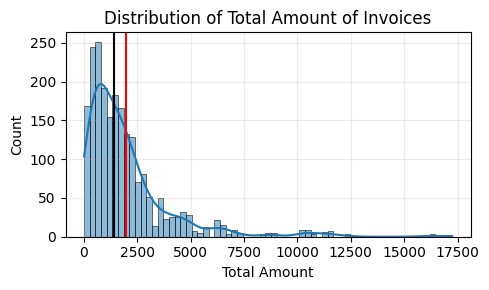

In [ ]:
# We need to know why mean > median, using histogram to know the shape of data
fig, ax = plt.subplots(1,1, figsize=(5,3), sharey=True)
#---------------------------------
sns.histplot(data=df, x = 'totalamount', ax=ax, kde=True)
ax.axvline(df.totalamount.mean(), color='r')
ax.axvline(df.totalamount.median(), color='black')
ax.set_title('Distribution of Total Amount of Invoices')
ax.set_xlabel('Total Amount')
#-------------------------------
plt.grid(alpha=0.25)
plt.tight_layout();

In [ ]:
# Boxplot to know the 5 number summary
px.box(data_frame=df, x = 'totalamount')

In [ ]:
px.bar(data_frame=orders.country.value_counts())

In [ ]:
city_group= orders.groupby(['country', 'city'], as_index=False)['orderid'].count().sort_values(by='orderid',ascending=False)

In [ ]:
px.bar(data_frame= city_group, x='city', y='orderid', color='country')

In [ ]:
lb, ub = orders.totalamount.mean() - (3 * orders.totalamount.std()), orders.totalamount.mean() + (3 * orders.totalamount.std())
lb,ub

(-4339.964070696104, 7603.719709250319)

In [ ]:
orders = orders[orders.totalamount.between(lb,ub)]

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   812 non-null    int32         
 1   firstname    812 non-null    object        
 2   lastname     812 non-null    object        
 3   city         812 non-null    object        
 4   country      812 non-null    object        
 5   orderid      812 non-null    int32         
 6   ordernumber  812 non-null    int32         
 7   orderdate    812 non-null    datetime64[ns]
 8   totalamount  812 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 53.9+ KB


In [ ]:
orders.describe()['totalamount'].T

count     812.00
mean    1,415.57
min        12.50
25%       477.00
50%       979.75
75%     1,924.56
max     7,390.20
std     1,322.84
Name: totalamount, dtype: float64

In [ ]:
px.bar(data_frame=orders.country.value_counts())

In [ ]:
city_group= orders.groupby(['country', 'city'], as_index=False)['orderid'].count().sort_values(by='orderid',ascending=False)

In [ ]:
px.bar(data_frame= city_group, x='city', y='orderid', color='country')

In [ ]:
sns.count

84